In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [3]:
import io
dataset = pd.DataFrame(pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv'])))
# Dataset is now stored in a Pandas Dataframe

In [4]:
dataset = dataset.sample(frac=1)

In [5]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
23,24,1,dodge d200,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,7957.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
112,113,0,peugeot 604sl,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.70,3.52,21.0,95,4150,28,33,16900.0
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 23 to 53
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
dataset.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Drop car_ID and CarName

In [10]:
dataset.drop(columns='car_ID', inplace=True)
dataset.drop(columns='CarName', inplace=True)
dataset.head(10)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
23,1,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,7957.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
112,0,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.70,3.52,21.0,95,4150,28,33,16900.0
138,2,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
15,0,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
31,2,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1819,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,31,38,6855.0
28,-1,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,four,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921.0
38,0,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2289,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095.0
190,3,gas,std,two,hatchback,fwd,front,94.5,165.7,64.0,51.4,2221,ohc,four,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980.0


One hot encoding

In [11]:
dataset = pd.get_dummies(dataset, prefix=['fueltype','aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'enginetype','cylindernumber', 
                                          'fuelsystem'])

In [12]:
dataset.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
23,1,93.7,157.3,63.8,50.8,2128,98,3.03,3.39,7.6,102,5500,24,30,7957.0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
112,0,107.9,186.7,68.4,56.7,3252,152,3.70,3.52,21.0,95,4150,28,33,16900.0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
138,2,93.7,156.9,63.4,53.7,2050,97,3.62,2.36,9.0,69,4900,31,36,5118.0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [13]:
dataset.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_m

Split train and test set

In [14]:
y = dataset['price']

In [15]:
y

23      7957.0
3      13950.0
112    16900.0
138     5118.0
2      16500.0
        ...   
184     7995.0
97      7999.0
67     25552.0
180    15690.0
53      6695.0
Name: price, Length: 205, dtype: float64

In [16]:
dataset.drop(columns='price', inplace=True)

In [17]:
dataset.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
23,1,93.7,157.3,63.8,50.8,2128,98,3.03,3.39,7.6,102,5500,24,30,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
112,0,107.9,186.7,68.4,56.7,3252,152,3.70,3.52,21.0,95,4150,28,33,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
138,2,93.7,156.9,63.4,53.7,2050,97,3.62,2.36,9.0,69,4900,31,36,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [18]:
dataset.shape

(205, 52)

In [19]:
X_train = dataset[:104]

In [20]:
Y_train = y[:104]

In [21]:
X_test = dataset[104:165]

In [22]:
Y_test = y[104:165]

In [23]:
X_val = dataset[165:]

In [24]:
Y_val = y[165:]

Normalization of data

In [25]:
X_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
23,1,93.7,157.3,63.8,50.8,2128,98,3.03,3.39,7.6,102,5500,24,30,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
112,0,107.9,186.7,68.4,56.7,3252,152,3.70,3.52,21.0,95,4150,28,33,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
138,2,93.7,156.9,63.4,53.7,2050,97,3.62,2.36,9.0,69,4900,31,36,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0,100.4,184.6,66.5,56.1,3296,181,3.43,3.27,9.0,152,5200,17,22,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
150,1,95.7,158.7,63.6,54.5,1985,92,3.05,3.03,9.0,62,4800,35,39,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
145,0,97.0,172.0,65.4,54.3,2510,108,3.62,2.64,7.7,111,4800,24,29,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
119,1,93.7,157.3,63.8,50.8,2128,98,3.03,3.39,7.6,102,5500,24,30,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
mean = X_train.iloc[: , 0:14].mean(axis=0)
X_train.iloc[: , 0:14] -= mean
std = X_train.iloc[:, 0:14].std(axis=0)
X_train.iloc[: , 0:14] /= std 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [27]:
X_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
23,0.141141,-0.868470,-1.295660,-0.971144,-1.189299,-0.832504,-0.734450,-1.090355,0.447416,-0.617718,-0.151920,0.594945,-0.120251,-0.059638,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0.956623,0.149183,0.200944,0.044772,0.241318,-0.436476,-0.472294,-0.524961,0.481769,0.013117,-0.151920,0.594945,-0.120251,-0.059638,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
112,-0.674341,1.500493,0.984141,0.976028,1.222313,1.297331,0.552499,1.277234,0.894006,2.904445,-0.318483,-2.166387,0.482455,0.383388,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
138,0.956623,-0.868470,-1.326678,-1.140463,-0.003930,-0.980304,-0.758282,0.994537,-3.090952,-0.249731,-0.937145,-0.632314,0.934485,0.826414,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0.141141,-0.735007,-0.217795,-0.251537,-0.535302,0.484431,0.552499,-2.327155,0.722241,-0.249731,1.085404,-0.427771,-0.873634,-0.650339,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,-0.674341,0.249280,0.821298,0.171761,0.977065,1.380705,1.243638,0.323131,0.035179,-0.249731,1.037815,-0.018684,-1.174987,-1.241041,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
150,0.141141,-0.534813,-1.187098,-1.055803,0.323068,-1.103471,-0.877444,-1.019681,-0.789295,-0.249731,-1.103708,-0.836857,1.537191,1.269440,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
145,-0.674341,-0.317936,-0.155760,-0.293867,0.241318,-0.108664,-0.496126,0.994537,-2.129065,-0.591433,0.062232,-0.836857,-0.120251,-0.207313,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
119,0.141141,-0.868470,-1.295660,-0.971144,-1.189299,-0.832504,-0.734450,-1.090355,0.447416,-0.617718,-0.151920,0.594945,-0.120251,-0.059638,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
val_mean = X_val.iloc[:, 0:14].mean(axis=0)
val_std = X_val.iloc[:, 0:14].std(axis=0)
X_val.iloc[:, 0:14] -= val_mean
X_val.iloc[:, 0:14] /= val_std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [29]:
test_mean = X_test.iloc[:, 0:14].mean(axis=0)
test_std =  X_test.iloc[:, 0:14].std(axis=0)
X_test.iloc[:, 0:14] -= test_mean
X_test.iloc[:, 0:14] /= test_std
X_test

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
79,0.180703,-0.854230,-1.299017,-0.963052,-1.119597,-0.771435,-0.638599,-1.055189,0.652471,-0.689158,0.064522,1.138019,-0.264273,-0.160174,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
98,0.968052,-0.551863,-0.907992,-0.963052,-0.183530,-1.026960,-0.661090,-0.621744,0.341649,-0.257771,-0.773431,0.435633,0.761588,0.816887,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
46,0.968052,-0.422276,-0.125942,-0.270757,-0.894941,0.327134,-0.166287,0.389626,0.155156,-0.305703,-0.240188,-0.032624,-0.264273,-0.299754,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
175,-1.393995,0.499226,0.104072,0.372088,0.041126,-0.269712,-0.098813,-0.043818,1.118704,-0.425533,-0.189403,-1.905654,0.175381,0.118986,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
153,-0.606646,-0.465472,-0.348290,-1.061951,1.988145,-0.519641,-0.773546,-0.982948,-0.466487,-0.353635,-0.951178,-0.500882,0.761588,0.816887,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.968052,-0.753441,-1.299017,-0.666354,-1.119597,-1.146329,-0.773546,-1.271911,0.155156,-0.257771,-0.798823,1.138019,0.761588,0.956467,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
164,0.180703,-0.638253,-0.424961,-0.864152,-0.445629,-0.661392,-0.638599,-0.477263,-0.466487,-0.353635,-0.748038,-0.500882,0.468485,0.398146,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
156,-0.606646,-0.465472,-0.608973,-0.666354,-0.295859,-0.890804,-0.638599,-0.477263,-0.466487,-0.353635,-0.748038,-0.500882,0.615036,0.816887,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
127,1.755401,-1.358177,-0.409627,-0.369656,-0.820056,0.368167,1.520544,1.509358,-0.870556,-0.233805,2.730734,2.074534,-1.290134,-0.858074,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [30]:
ytrain_mean = Y_train.mean(axis=0)
ytrain_std = Y_train.std(axis=0)
Y_train -= ytrain_mean
Y_train /= ytrain_std
Y_train

23    -0.703902
3     -0.019414
112    0.317518
138   -1.028157
2      0.271833
         ...   
102    0.031868
150   -1.001888
145   -0.326766
119   -0.703902
120   -0.901265
Name: price, Length: 104, dtype: float64

In [31]:
yval_mean = Y_val.mean(axis=0)
yval__std = Y_val.std(axis=0)
Y_val -= yval_mean
Y_val /= yval__std
Y_val

142   -0.666065
176   -0.173404
13     1.436777
48     3.715514
60    -0.552483
41     0.149516
99    -0.480863
160   -0.671902
33    -0.862625
62    -0.276416
68     2.563604
133    0.027258
57     0.259943
144   -0.436062
182   -0.666065
39    -0.497270
55    -0.165989
43    -0.822240
172    0.894739
29     0.152513
78    -0.840539
137    1.044762
84     0.393086
149   -0.047833
87    -0.428805
171   -0.070707
152   -0.869093
45    -0.485990
35    -0.741786
130   -0.426281
82     0.099666
183   -0.634514
186   -0.552483
179    0.631135
163   -0.621421
184   -0.631359
97    -0.630728
67     2.138303
180    0.582547
53    -0.836438
Name: price, dtype: float64

In [42]:
ytest_mean = Y_test.mean(axis=0)
ytest_std = Y_test.std(axis=0)
Y_test -= ytest_mean
Y_test /= ytest_std
Y_test

79    -0.663200
98    -0.588758
46    -0.216681
175   -0.357589
153   -0.765690
         ...   
77    -0.862597
164   -0.590220
156   -0.763031
127    2.838094
12     1.102269
Name: price, Length: 61, dtype: float64

In [43]:
X_train.shape[1]

52

In [44]:
X_val.shape

(40, 52)

Build a Model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [46]:
network = Sequential()

In [81]:
network.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.002), input_shape=(X_train.shape[1],)))
network.add(layers.Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
network.add(layers.Dense(1))

In [82]:
network.compile(optimizer='adam', loss='mse', metrics='mae')

In [83]:
history = network.fit(X_train,Y_train, batch_size=20, epochs=30, validation_data=(X_val, Y_val))

Epoch 1/30
6/6 [==============================] - 2s 86ms/step - loss: 0.9097 - mae: 0.6775 - val_loss: 0.8625 - val_mae: 0.6330
Epoch 2/30
6/6 [==============================] - 0s 12ms/step - loss: 0.9437 - mae: 0.6711 - val_loss: 0.8256 - val_mae: 0.6132
Epoch 3/30
6/6 [==============================] - 0s 11ms/step - loss: 0.7606 - mae: 0.6204 - val_loss: 0.7925 - val_mae: 0.5988
Epoch 4/30
6/6 [==============================] - 0s 12ms/step - loss: 0.8602 - mae: 0.6462 - val_loss: 0.7581 - val_mae: 0.5838
Epoch 5/30
6/6 [==============================] - 0s 12ms/step - loss: 0.6938 - mae: 0.5850 - val_loss: 0.7270 - val_mae: 0.5636
Epoch 6/30
6/6 [==============================] - 0s 10ms/step - loss: 0.8172 - mae: 0.6196 - val_loss: 0.6984 - val_mae: 0.5399
Epoch 7/30
6/6 [==============================] - 0s 11ms/step - loss: 0.6200 - mae: 0.5194 - val_loss: 0.6744 - val_mae: 0.5305
Epoch 8/30
6/6 [==============================] - 0s 10ms/step - loss: 0.6851 - mae: 0.5628 - val

In [84]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [85]:
epochs = range(1, 31)

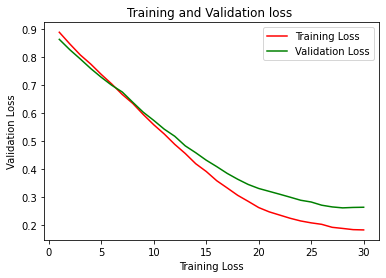

In [86]:
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation loss ')
plt.xlabel('Training Loss')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [87]:
network.predict(X_test)

array([[-0.61111856],
       [-0.61111856],
       [-0.61111856],
       [-0.61111856],
       [-0.61111856],
       [-0.61111856],
       [-0.61111856],
       [ 0.9387784 ],
       [-0.61111856],
       [-0.61111856],
       [-0.61111856],
       [ 0.58017826],
       [-0.61111856],
       [-0.61111856],
       [-0.61111856],
       [-0.61111856],
       [ 0.04832666],
       [-0.61111856],
       [-0.61111856],
       [-0.61111856],
       [ 0.47650263],
       [ 2.1101234 ],
       [ 0.13394633],
       [ 2.1101234 ],
       [ 1.2721735 ],
       [ 0.70544475],
       [-0.61111856],
       [-0.61111856],
       [-0.61111856],
       [-0.43271434],
       [-0.61111856],
       [ 0.5858702 ],
       [ 2.1101234 ],
       [ 0.5516032 ],
       [-0.56352955],
       [ 0.0643647 ],
       [ 0.3218117 ],
       [-0.61111856],
       [ 0.306229  ],
       [-0.61111856],
       [ 0.04832666],
       [-0.61111856],
       [ 0.23507729],
       [-0.61111856],
       [-0.57265073],
       [ 0

In [88]:
network.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.2850 - mae: 0.3101


[0.28504857420921326, 0.3101048469543457]

<center> <b>Thanks</b> 😍 </center>